## <U><center>Bi-Variate Analysis

### <U><center>Categorical Vs Categorical:

In [1]:
###Loading Initial libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
LS=pd.read_csv('Lead Scoring.csv')
LS.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [3]:
print("Number of Rows in Dataset=",LS.shape[0],"and number of Columns in dataset=",LS.shape[1])

Number of Rows in Dataset= 9240 and number of Columns in dataset= 37


In [4]:
LS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
LS.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
LS.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
LS['Lead Source'].replace({'google':'Google'},inplace=True)
LS = LS.replace('Select', np.nan)

In [8]:
LS['Lead Source']=LS['Lead Source'].fillna(LS['Lead Source'].mode()[0])
LS['TotalVisits']=LS['TotalVisits'].fillna(LS['TotalVisits'].median())
LS['Page Views Per Visit']=LS['Page Views Per Visit'].fillna(LS['Page Views Per Visit'].median())
LS['Last Activity']=LS['Last Activity'].fillna(LS['Last Activity'].mode()[0])
LS['Country']=LS['Country'].fillna(method='bfill')
LS['Specialization']=LS['Specialization'].fillna(method='bfill')
LS['How did you hear about X Education']=LS['How did you hear about X Education'].fillna(method='bfill')
LS['What is your current occupation']=LS['What is your current occupation'].fillna(method='bfill')
LS['What matters most to you in choosing a course']=LS['What matters most to you in choosing a course'].fillna(method='bfill')
LS['Tags']=LS['Tags'].fillna(method='bfill')
LS['Lead Quality'] = LS['Lead Quality'].replace(np.nan, 'Not Sure')
# We drop this column later 
LS['Lead Profile']=LS['Lead Profile'].fillna(method='bfill')
LS['City']=LS['City'].fillna(method='bfill')

In [9]:
#Replacing the space in column names by '_' and converting to lower case
LS.columns = LS.columns.str.lower().str.strip().str.replace(' ','_')
LS.rename(columns = {'totalvisits':'total_visits'},inplace = True)
LS.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'total_visits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [10]:
LS.head()

prospect_id  lead_number              lead_origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      lead_source do_not_email do_not_call  converted  total_visits  \
0      Olark Chat           No          No          0           0.0   
1  Organic Search           No          No          0           5.0   
2  Direct Traffic           No          No          1           2.0   
3  Direct Traffic           No          No          0           1.0   
4          Google           No          No          1           2.0   

   total_time_spent_on_website  page_views_per_visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  get_updates_on_dm_content    lead_profile    city  \
0                        No  Potential Lead  Mumbai   
1                        No  Potential Lead  Mumbai   
2                        No  Potential Lead  Mumbai   
3                        No  Potential Lead  Mumbai   
4                        No  Potential Lead  Mumbai   

  asymmetrique_activity_index asymmetrique_profile_index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  asymmetrique_activity_score asymmetrique_profile_score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  i_agree_to_pay_the_amount_through_cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  a_free_copy_of_mastering_the_interview last_notable_activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [11]:
LS.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'total_visits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [12]:
Cat=[]
Num=[]
for i in LS.columns:
    if LS[i].dtype=='float64' or LS[i].dtype=='int64':
        Num.append(i)
    else :
        Cat.append(i)
print("The Numerical features in the dataset are ",Num)
print('\n')
print("The categorical features in the dataset are ",Cat)

The Numerical features in the dataset are  ['lead_number', 'converted', 'total_visits', 'total_time_spent_on_website', 'page_views_per_visit', 'asymmetrique_activity_score', 'asymmetrique_profile_score']


The categorical features in the dataset are  ['prospect_id', 'lead_origin', 'lead_source', 'do_not_email', 'do_not_call', 'last_activity', 'country', 'specialization', 'how_did_you_hear_about_x_education', 'what_is_your_current_occupation', 'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine', 'newspaper_article', 'x_education_forums', 'newspaper', 'digital_advertisement', 'through_recommendations', 'receive_more_updates_about_our_courses', 'tags', 'lead_quality', 'update_me_on_supply_chain_content', 'get_updates_on_dm_content', 'lead_profile', 'city', 'asymmetrique_activity_index', 'asymmetrique_profile_index', 'i_agree_to_pay_the_amount_through_cheque', 'a_free_copy_of_mastering_the_interview', 'last_notable_activity']


## Beginning of Bi-variate

In [13]:
removal_elements = ['prospect_id','do_not_call','search','newspaper','newspaper_article','digital_advertisement','x_education_forums','through_recommendations',
                   'receive_more_updates_about_our_courses','update_me_on_supply_chain_content','get_updates_on_dm_content',
                    'i_agree_to_pay_the_amount_through_cheque','asymmetrique_activity_index','asymmetrique_profile_index',
                    'asymmetrique_activity_score','asymmetrique_profile_score']
Cat_updated = Cat
for i in removal_elements:
    if i in Cat:
        Cat_updated.remove(i)
Cat_updated

['lead_origin',
 'lead_source',
 'do_not_email',
 'last_activity',
 'country',
 'specialization',
 'how_did_you_hear_about_x_education',
 'what_is_your_current_occupation',
 'what_matters_most_to_you_in_choosing_a_course',
 'magazine',
 'tags',
 'lead_quality',
 'lead_profile',
 'city',
 'a_free_copy_of_mastering_the_interview',
 'last_notable_activity']

In [14]:
len(Cat_updated)

16

## For lead_origin

<Figure size 1800x1080 with 0 Axes>

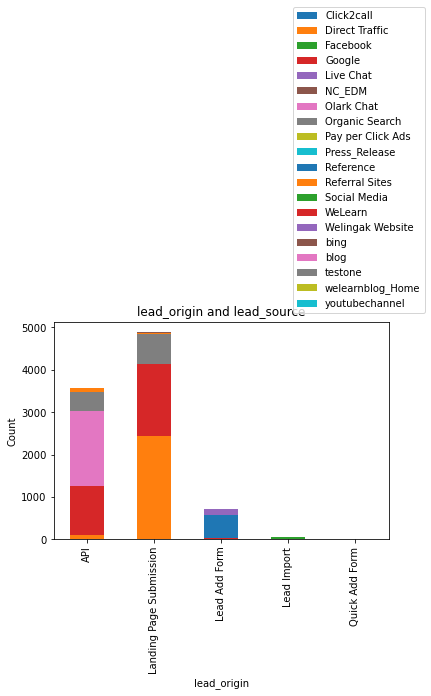

<Figure size 1800x1080 with 0 Axes>

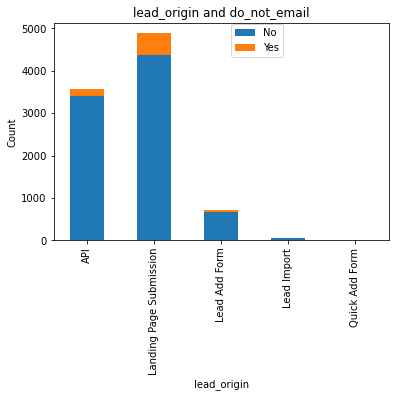

<Figure size 1800x1080 with 0 Axes>

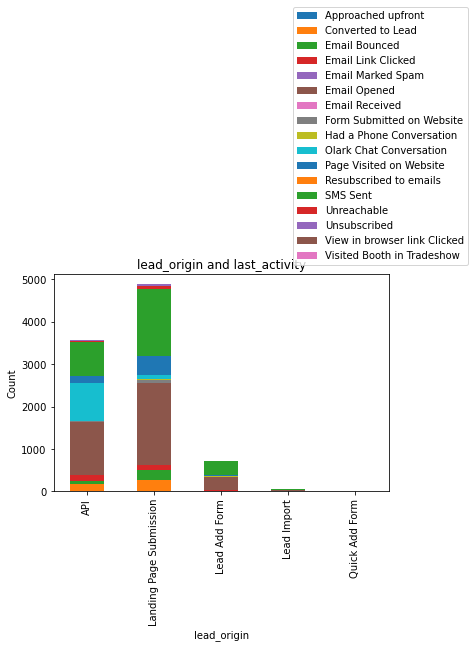

<Figure size 1800x1080 with 0 Axes>

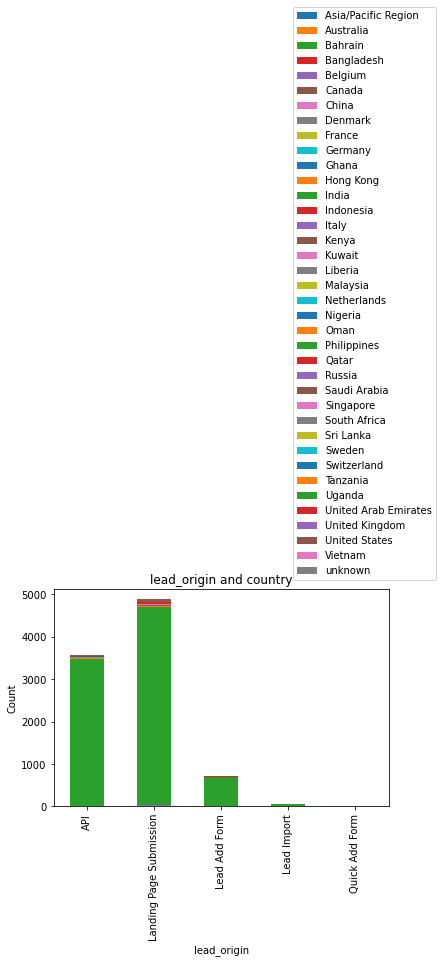

<Figure size 1800x1080 with 0 Axes>

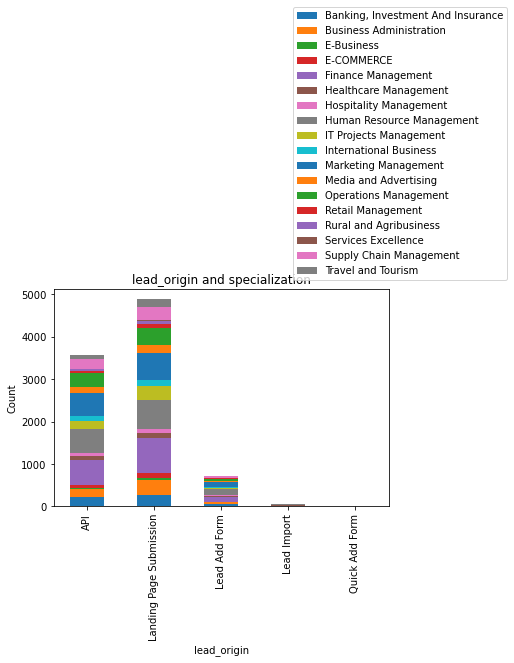

<Figure size 1800x1080 with 0 Axes>

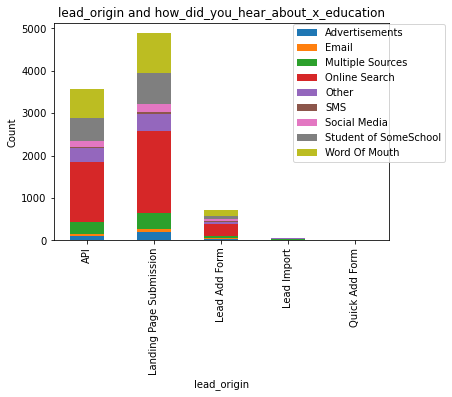

<Figure size 1800x1080 with 0 Axes>

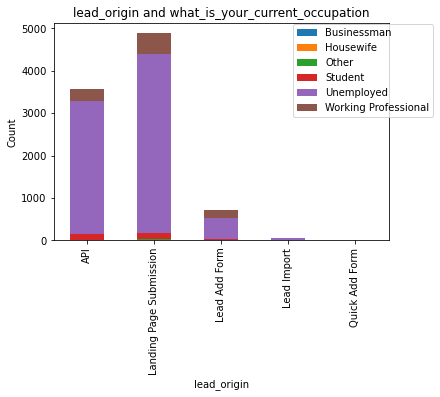

<Figure size 1800x1080 with 0 Axes>

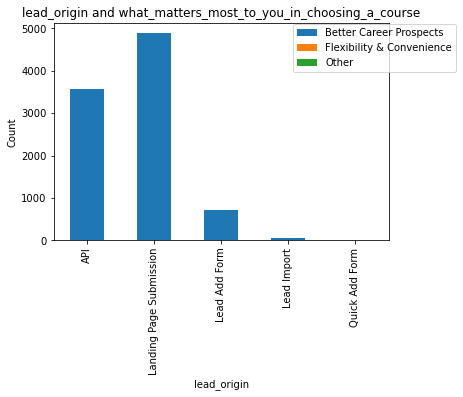

<Figure size 1800x1080 with 0 Axes>

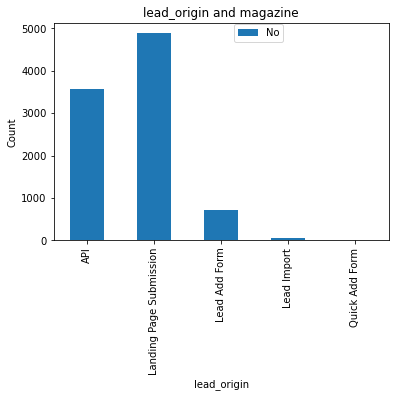

<Figure size 1800x1080 with 0 Axes>

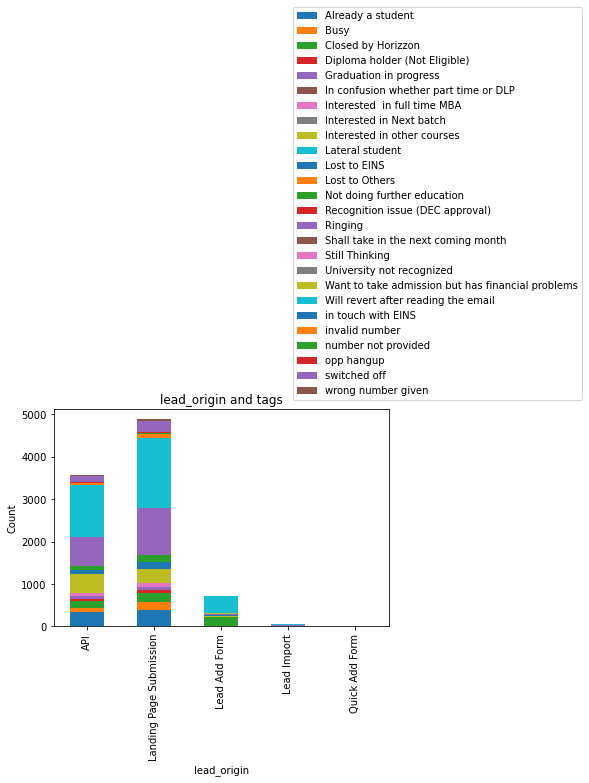

<Figure size 1800x1080 with 0 Axes>

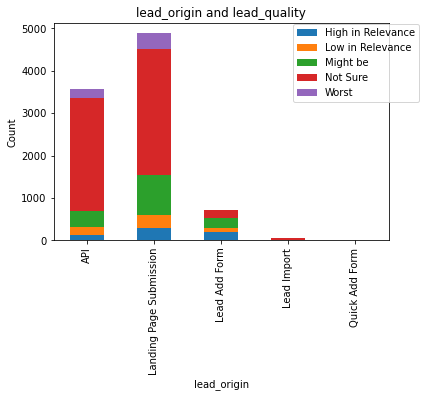

<Figure size 1800x1080 with 0 Axes>

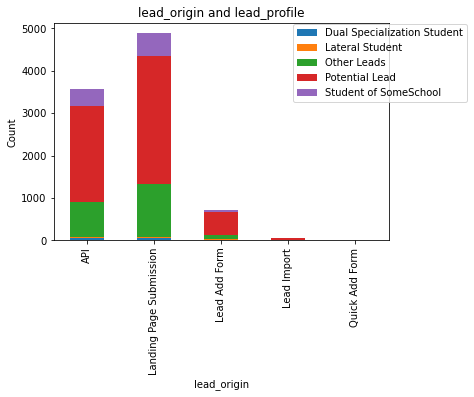

<Figure size 1800x1080 with 0 Axes>

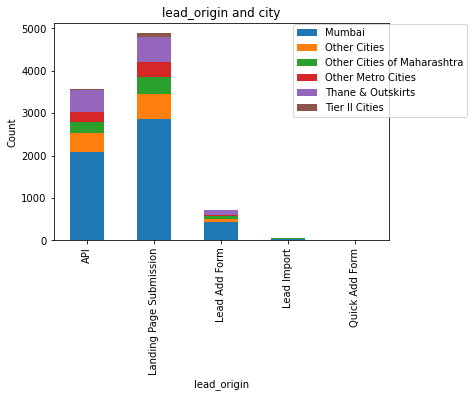

<Figure size 1800x1080 with 0 Axes>

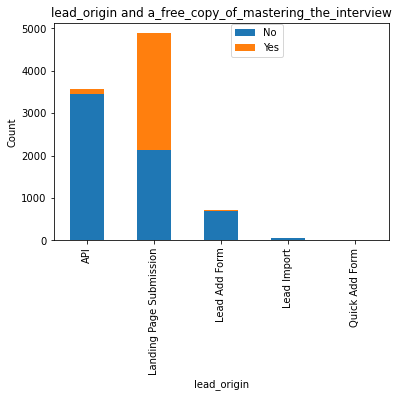

<Figure size 1800x1080 with 0 Axes>

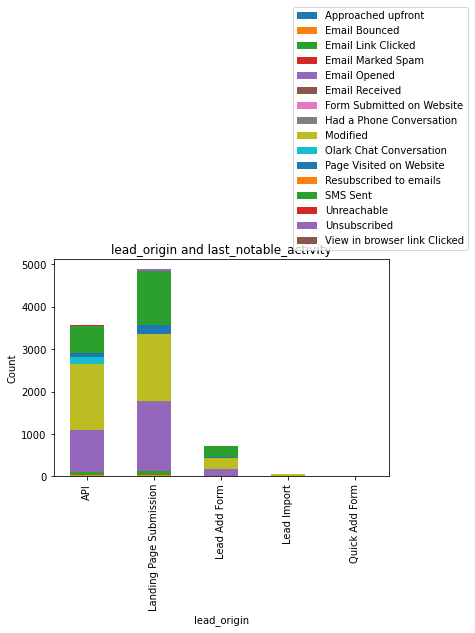

In [15]:
for i in Cat_updated[1:]:
    tab = pd.crosstab(index=LS['lead_origin'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('lead_origin')
    plt.ylabel('Count')
    plt.title('lead_origin and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

#### Inferences on lead_origin Vs all other categorical attributes:

## For lead_source

<Figure size 1800x1080 with 0 Axes>

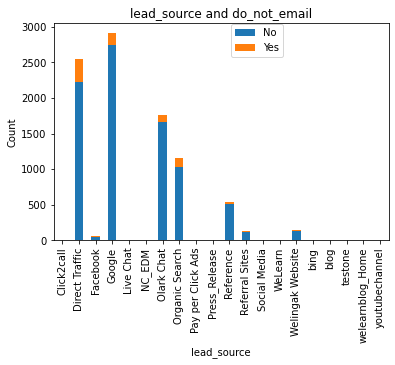

<Figure size 1800x1080 with 0 Axes>

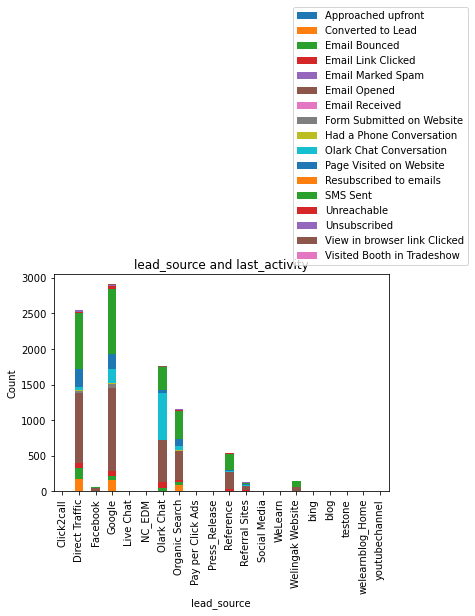

<Figure size 1800x1080 with 0 Axes>

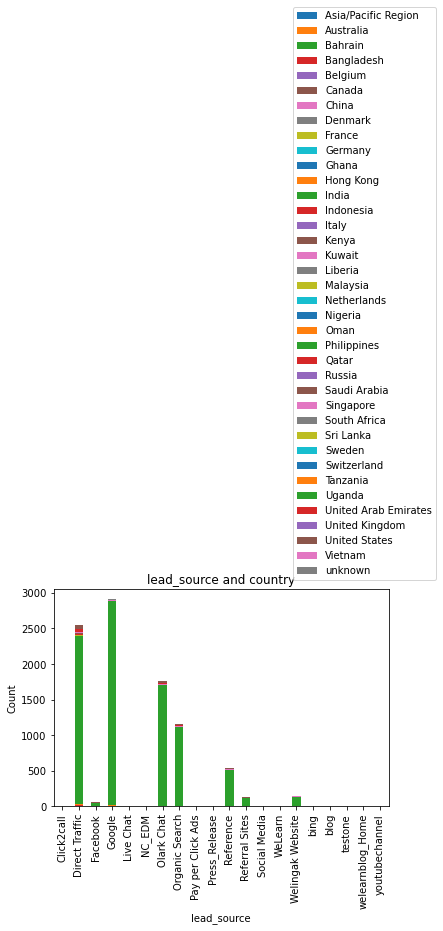

<Figure size 1800x1080 with 0 Axes>

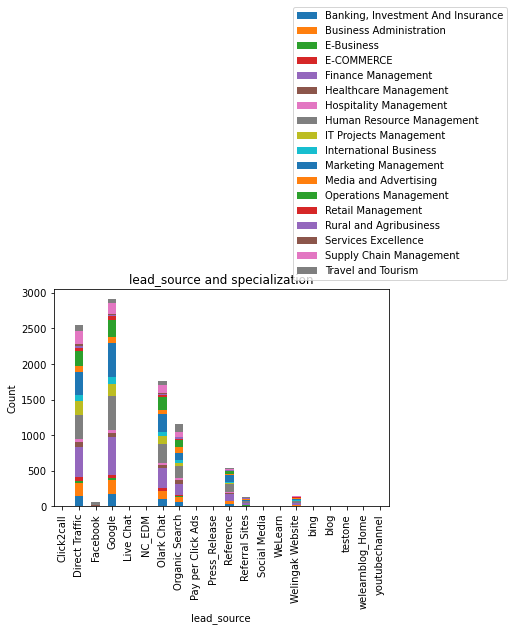

<Figure size 1800x1080 with 0 Axes>

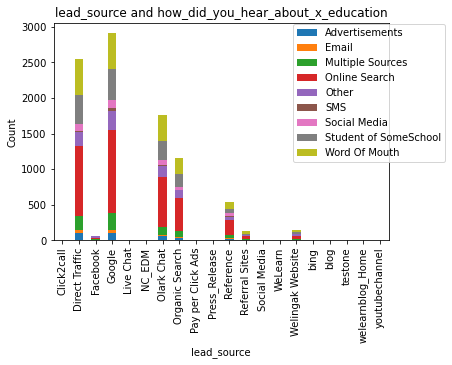

<Figure size 1800x1080 with 0 Axes>

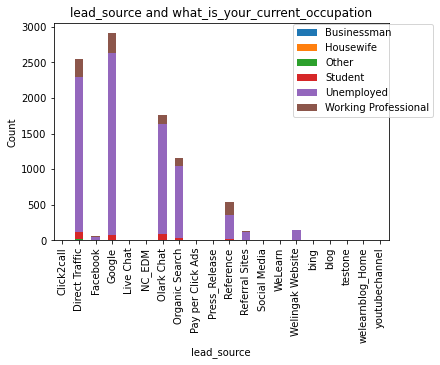

<Figure size 1800x1080 with 0 Axes>

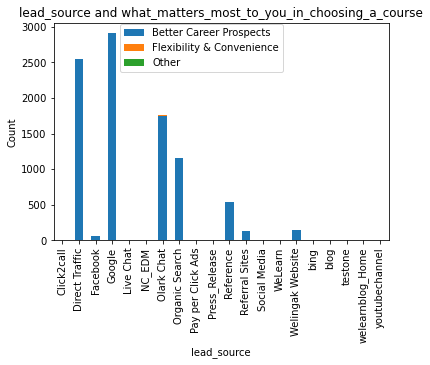

<Figure size 1800x1080 with 0 Axes>

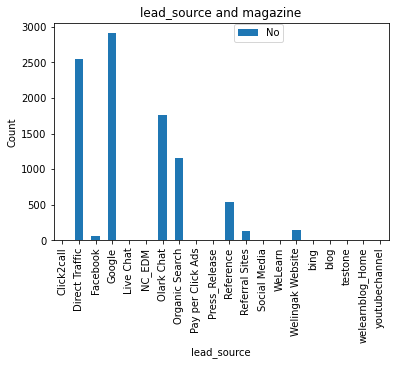

<Figure size 1800x1080 with 0 Axes>

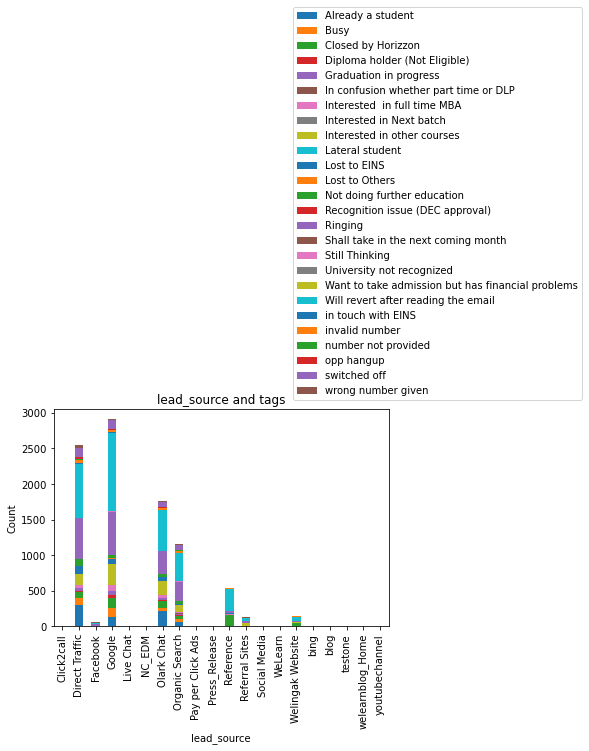

<Figure size 1800x1080 with 0 Axes>

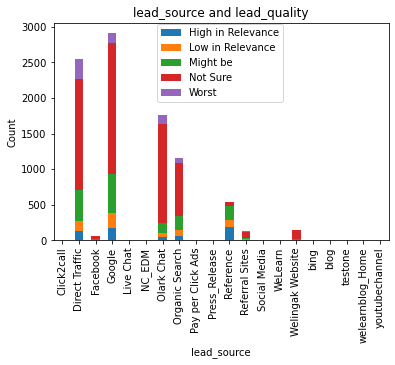

<Figure size 1800x1080 with 0 Axes>

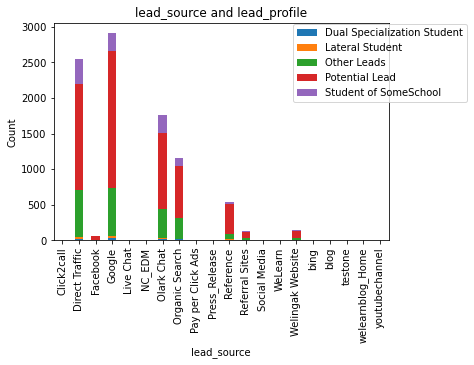

<Figure size 1800x1080 with 0 Axes>

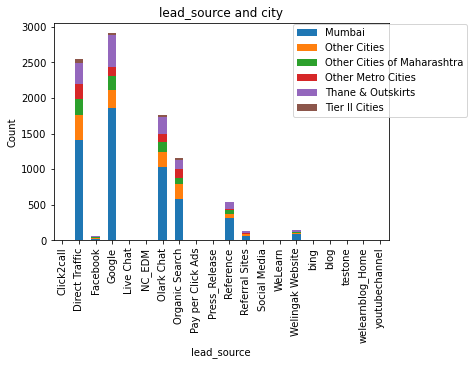

<Figure size 1800x1080 with 0 Axes>

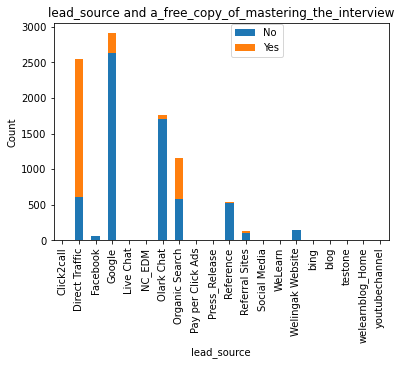

<Figure size 1800x1080 with 0 Axes>

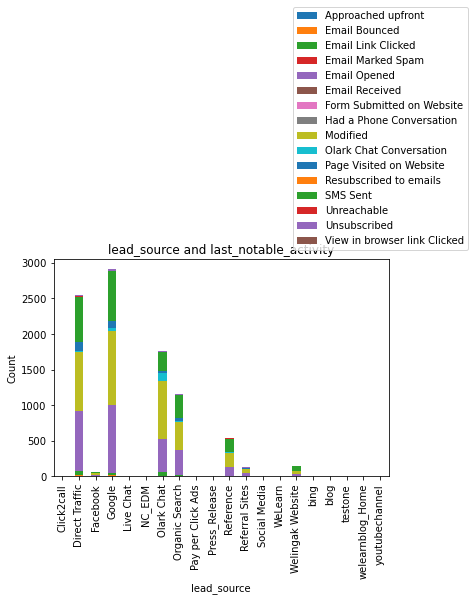

In [16]:
for i in Cat_updated[2:]:
    tab = pd.crosstab(index=LS['lead_source'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('lead_source')
    plt.ylabel('Count')
    plt.title('lead_source and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

#### Inferences on lead_source Vs all other categorical attributes:

## For do_not_email

<Figure size 1800x1080 with 0 Axes>

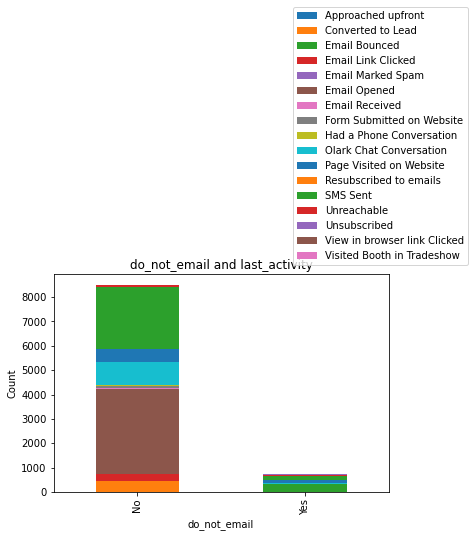

<Figure size 1800x1080 with 0 Axes>

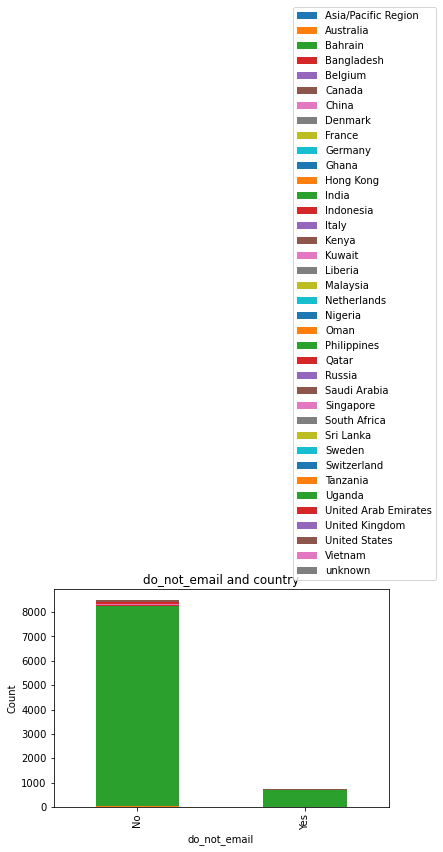

<Figure size 1800x1080 with 0 Axes>

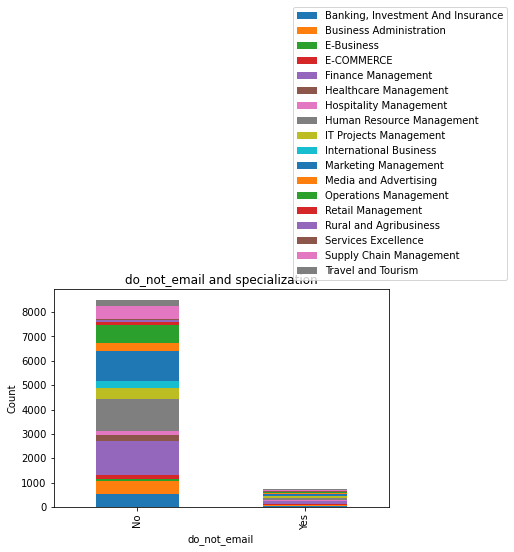

<Figure size 1800x1080 with 0 Axes>

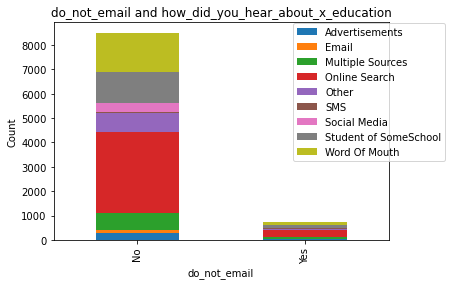

<Figure size 1800x1080 with 0 Axes>

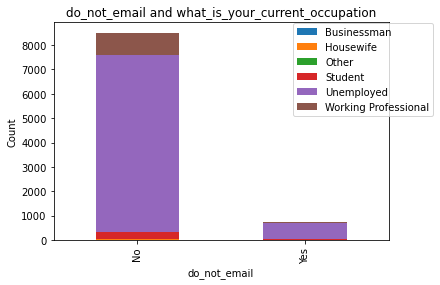

<Figure size 1800x1080 with 0 Axes>

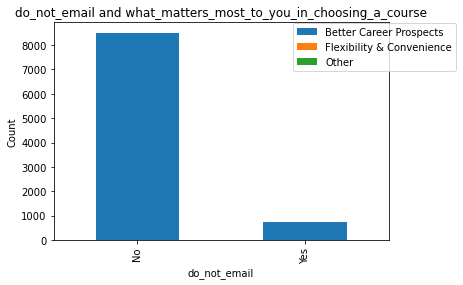

<Figure size 1800x1080 with 0 Axes>

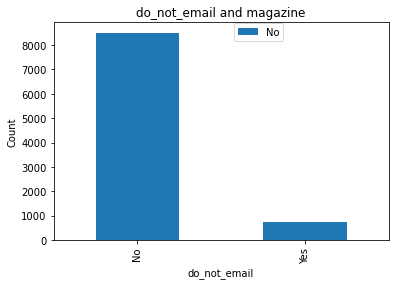

<Figure size 1800x1080 with 0 Axes>

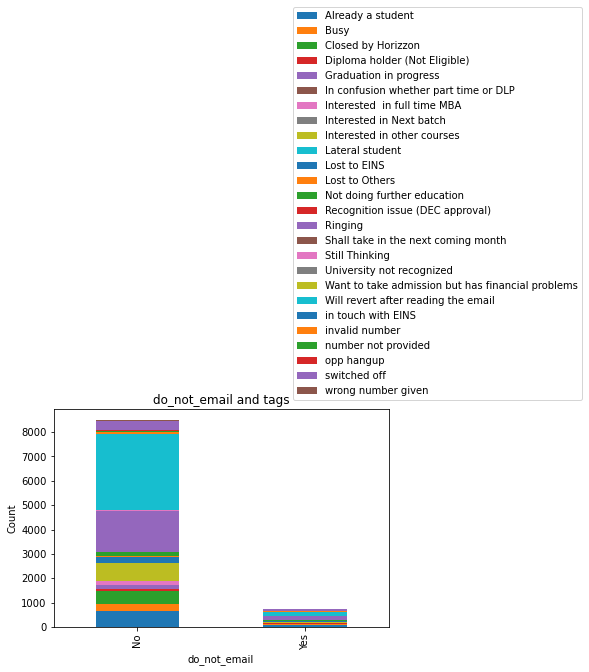

<Figure size 1800x1080 with 0 Axes>

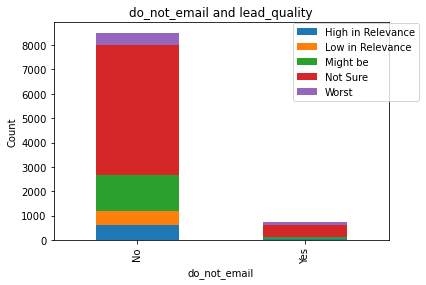

<Figure size 1800x1080 with 0 Axes>

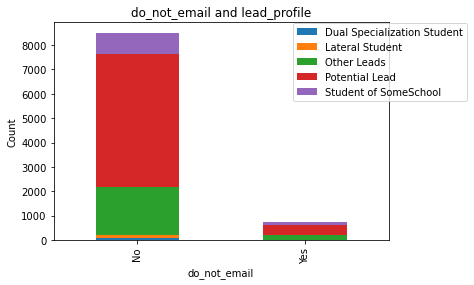

<Figure size 1800x1080 with 0 Axes>

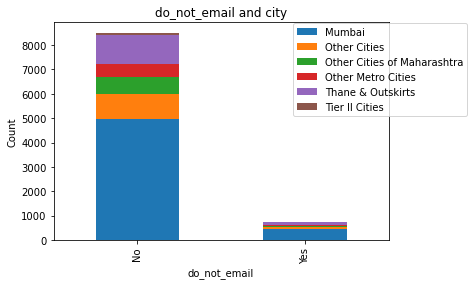

<Figure size 1800x1080 with 0 Axes>

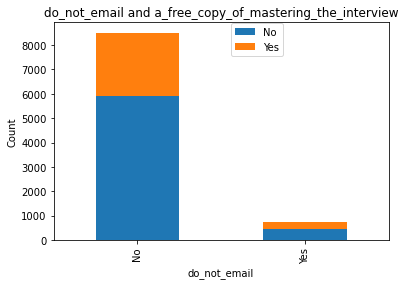

<Figure size 1800x1080 with 0 Axes>

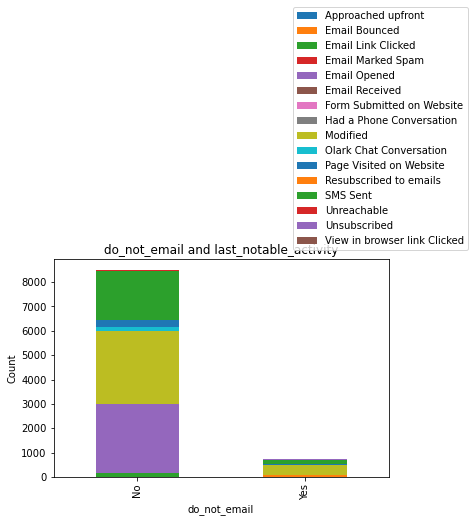

In [17]:
for i in Cat_updated[3:]:
    tab = pd.crosstab(index=LS['do_not_email'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('do_not_email')
    plt.ylabel('Count')
    plt.title('do_not_email and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

#### Inferences on do_not_email Vs all other categorical attributes:

## For last_activity

<Figure size 1800x1080 with 0 Axes>

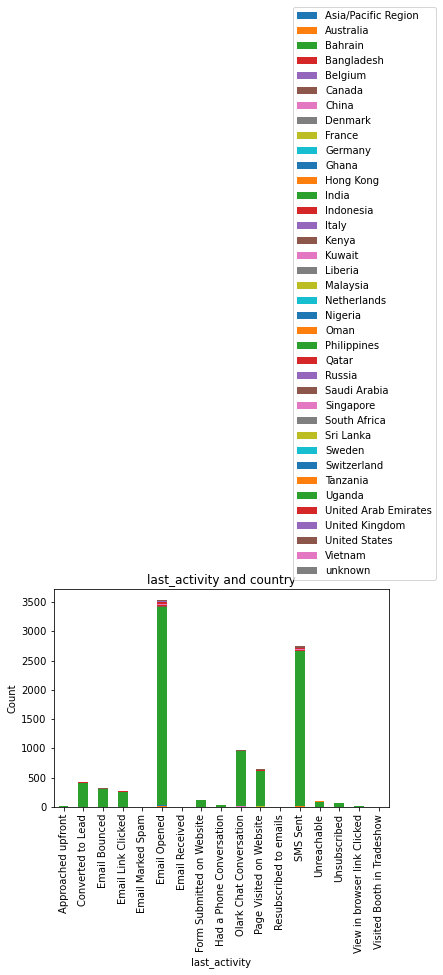

<Figure size 1800x1080 with 0 Axes>

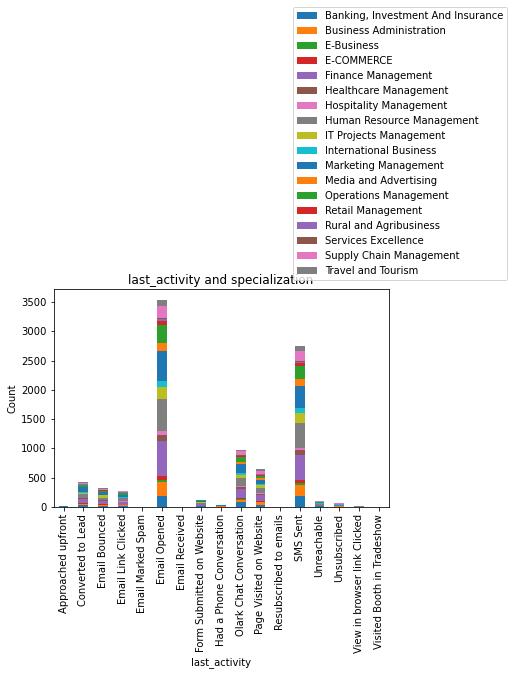

<Figure size 1800x1080 with 0 Axes>

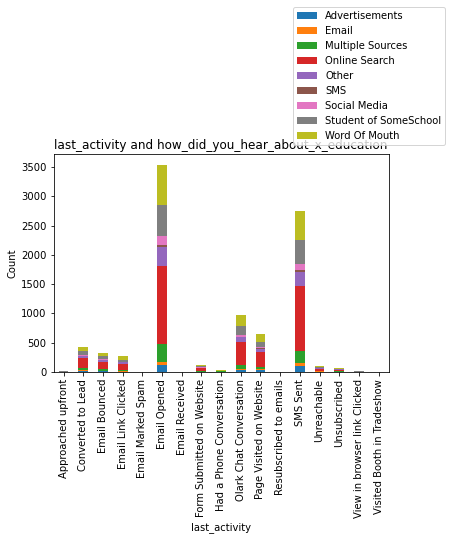

<Figure size 1800x1080 with 0 Axes>

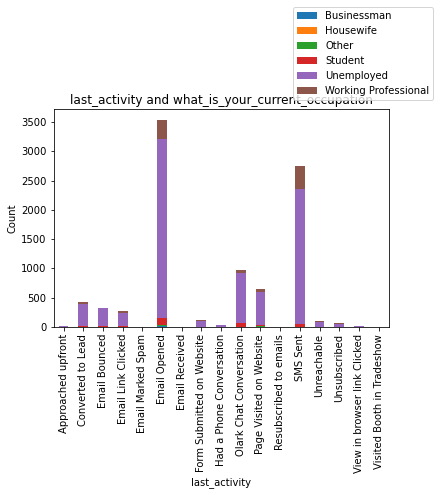

<Figure size 1800x1080 with 0 Axes>

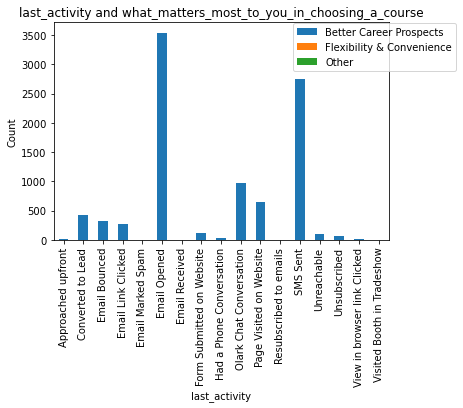

<Figure size 1800x1080 with 0 Axes>

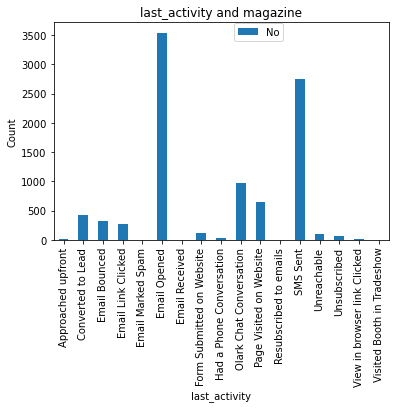

<Figure size 1800x1080 with 0 Axes>

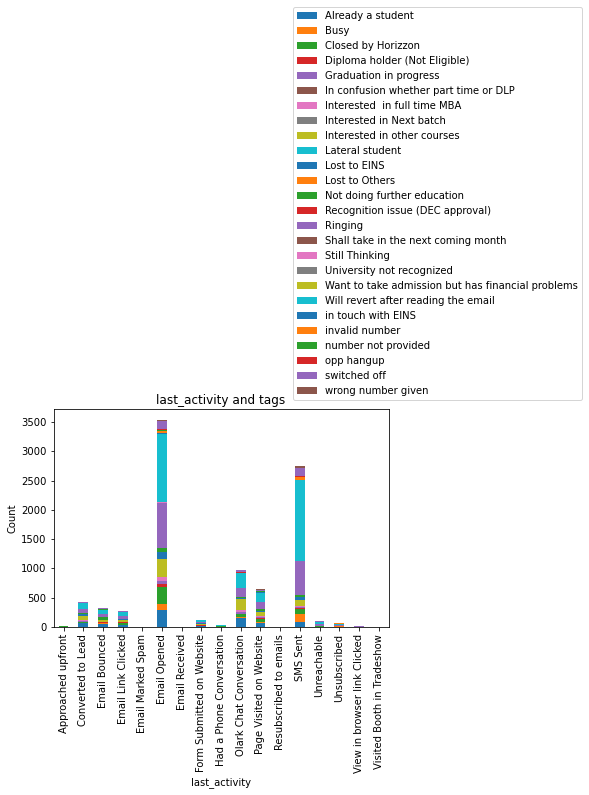

<Figure size 1800x1080 with 0 Axes>

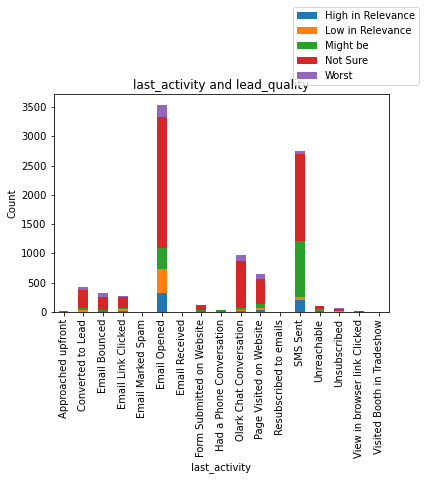

<Figure size 1800x1080 with 0 Axes>

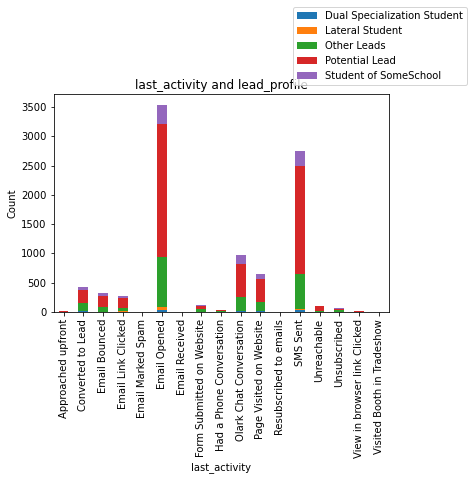

<Figure size 1800x1080 with 0 Axes>

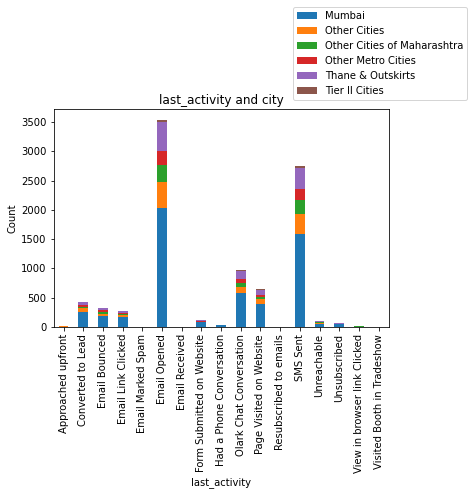

<Figure size 1800x1080 with 0 Axes>

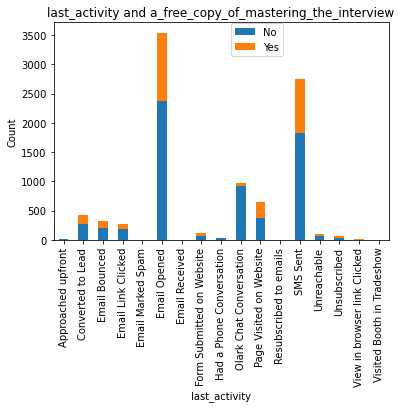

<Figure size 1800x1080 with 0 Axes>

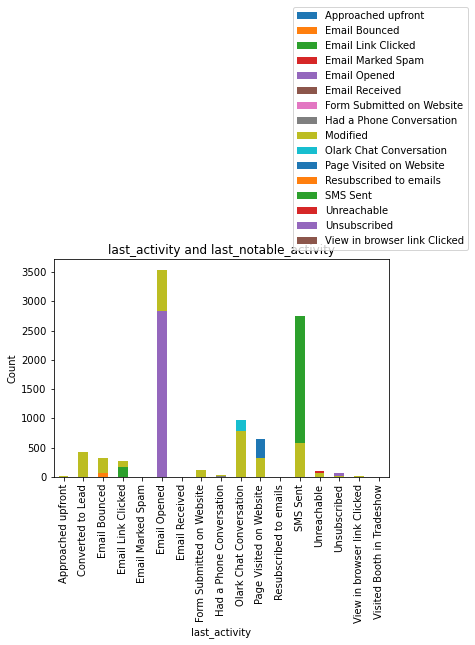

In [18]:
for i in Cat_updated[4:]:
    tab = pd.crosstab(index=LS['last_activity'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('last_activity')
    plt.ylabel('Count')
    plt.title('last_activity and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

#### Inferences on last_activity Vs all other categorical attributes:

## For country

<Figure size 1800x1080 with 0 Axes>

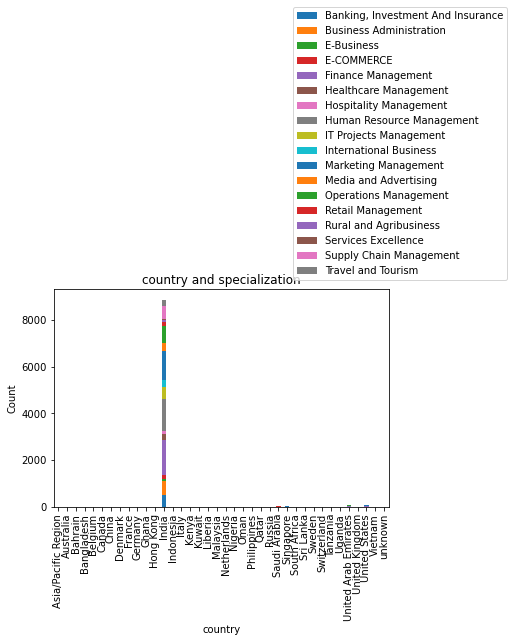

<Figure size 1800x1080 with 0 Axes>

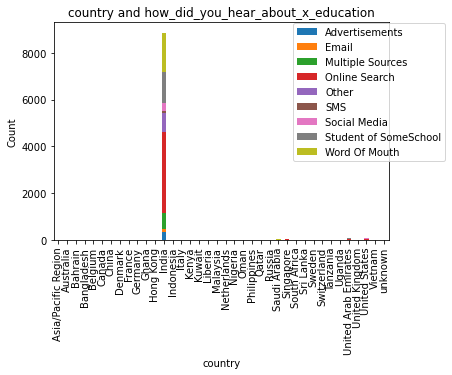

<Figure size 1800x1080 with 0 Axes>

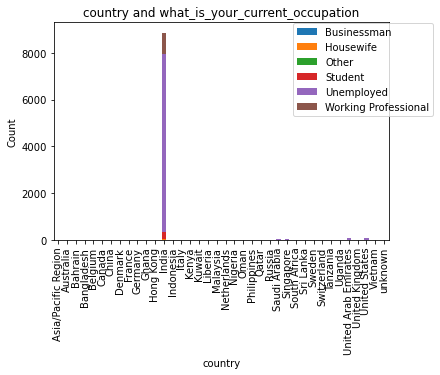

<Figure size 1800x1080 with 0 Axes>

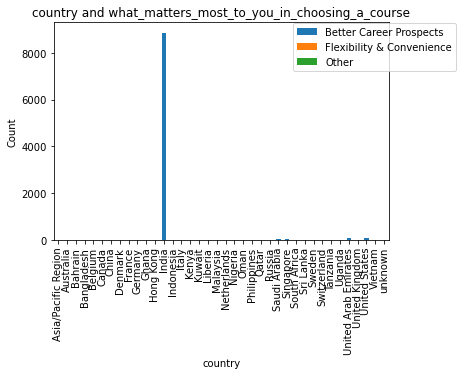

<Figure size 1800x1080 with 0 Axes>

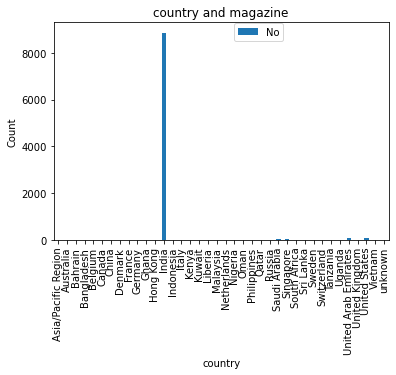

<Figure size 1800x1080 with 0 Axes>

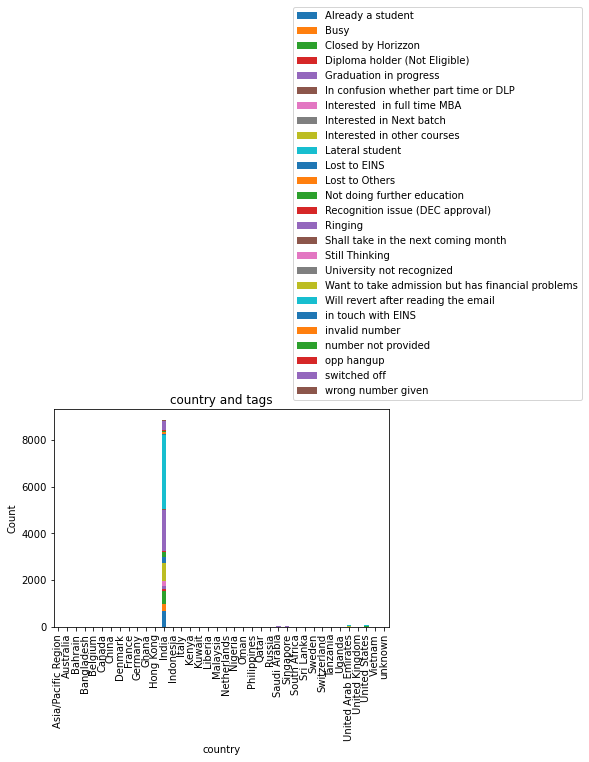

<Figure size 1800x1080 with 0 Axes>

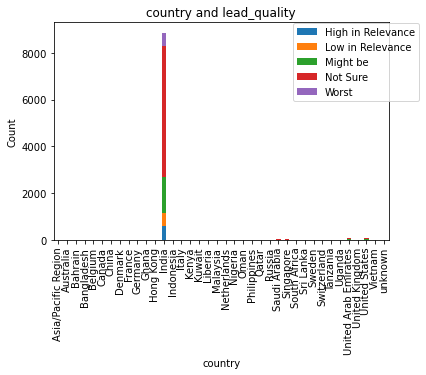

<Figure size 1800x1080 with 0 Axes>

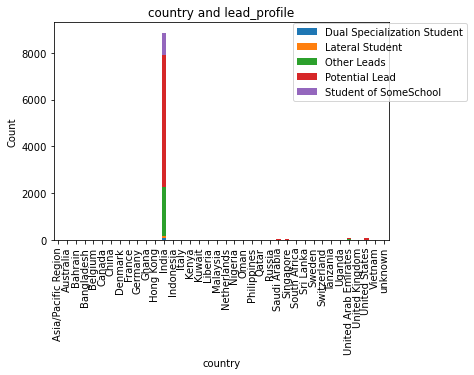

<Figure size 1800x1080 with 0 Axes>

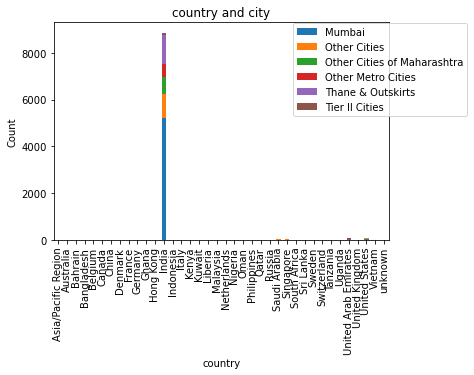

<Figure size 1800x1080 with 0 Axes>

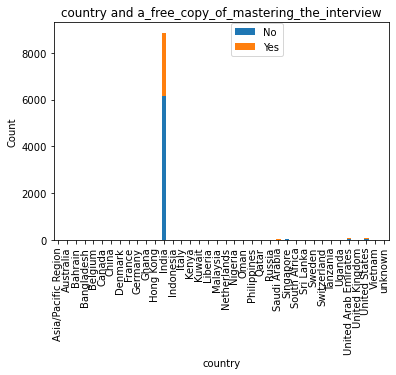

<Figure size 1800x1080 with 0 Axes>

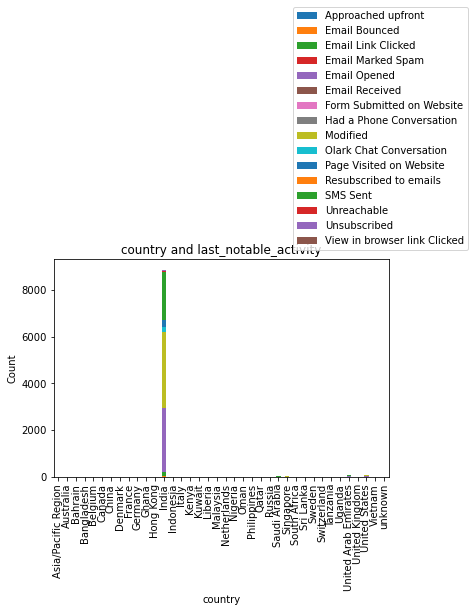

In [19]:
for i in Cat_updated[5:]:
    tab = pd.crosstab(index=LS['country'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('country')
    plt.ylabel('Count')
    plt.title('country and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

#### Inferences on country Vs all other categorical attributes:

## For specialization

<Figure size 1800x1080 with 0 Axes>

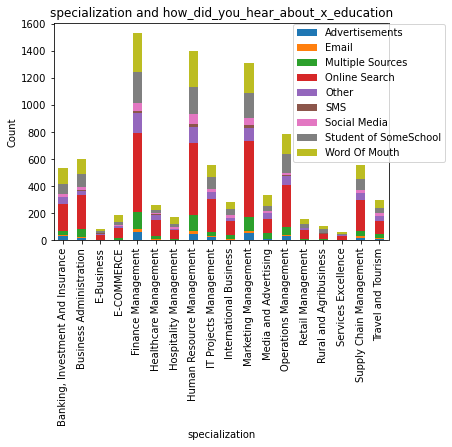

<Figure size 1800x1080 with 0 Axes>

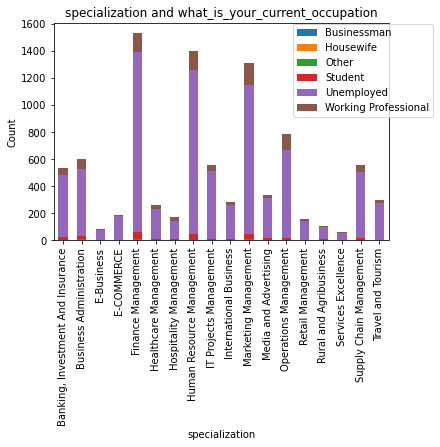

<Figure size 1800x1080 with 0 Axes>

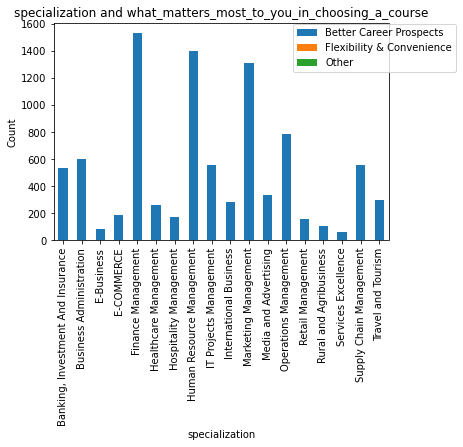

<Figure size 1800x1080 with 0 Axes>

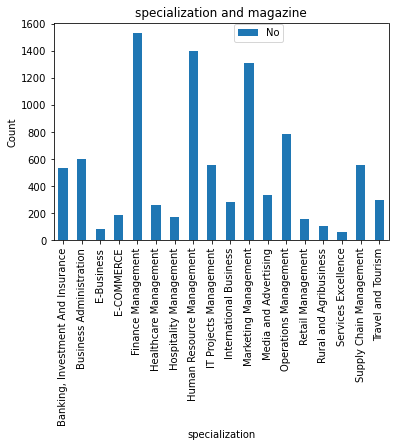

<Figure size 1800x1080 with 0 Axes>

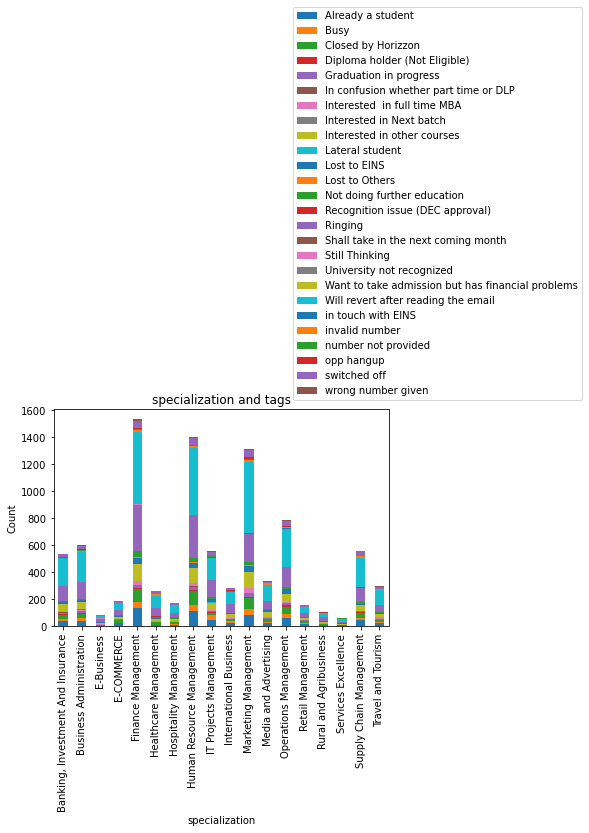

<Figure size 1800x1080 with 0 Axes>

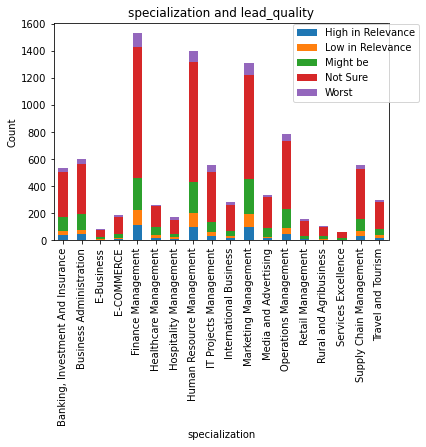

<Figure size 1800x1080 with 0 Axes>

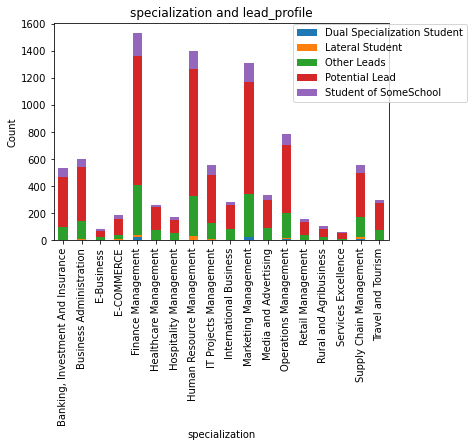

<Figure size 1800x1080 with 0 Axes>

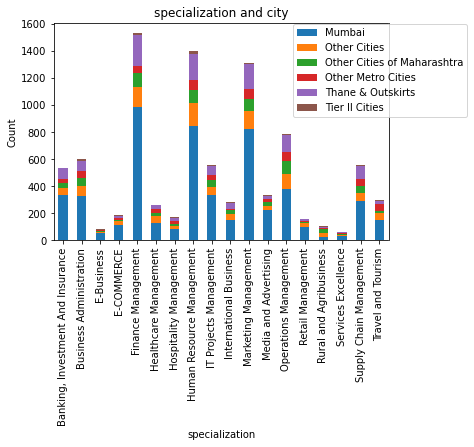

<Figure size 1800x1080 with 0 Axes>

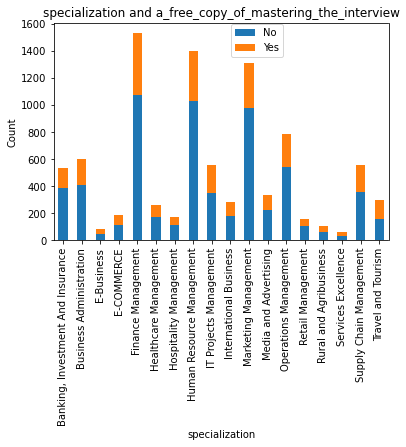

<Figure size 1800x1080 with 0 Axes>

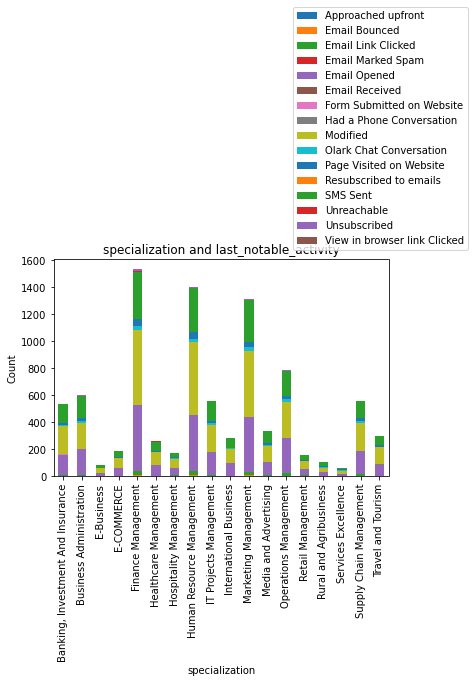

In [20]:
for i in Cat_updated[6:]:
    tab = pd.crosstab(index=LS['specialization'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('specialization')
    plt.ylabel('Count')
    plt.title('specialization and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

#### Inferences on specialization Vs all other categorical attributes:

## For 'how_did_you_hear_about_x_education'

<Figure size 1800x1080 with 0 Axes>

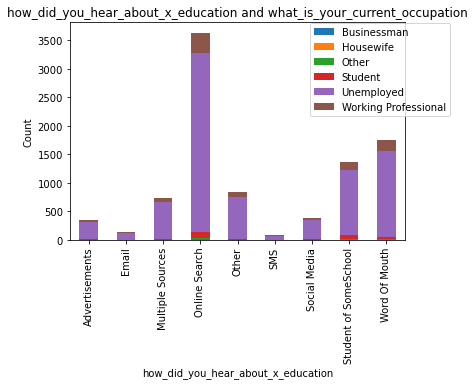

<Figure size 1800x1080 with 0 Axes>

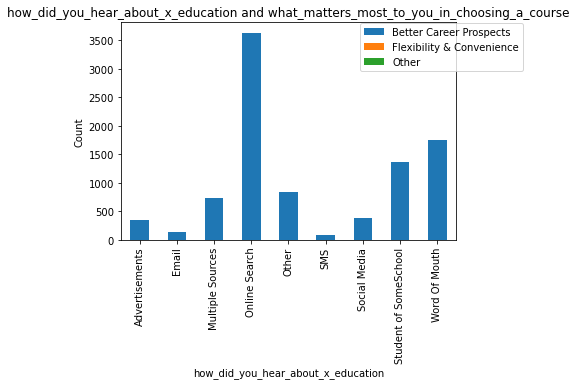

<Figure size 1800x1080 with 0 Axes>

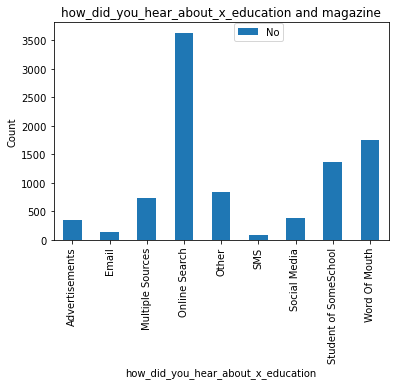

<Figure size 1800x1080 with 0 Axes>

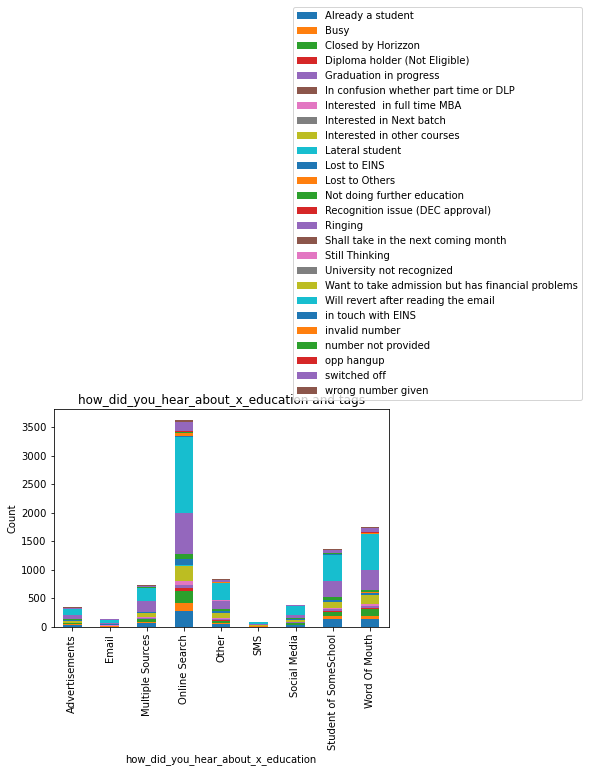

<Figure size 1800x1080 with 0 Axes>

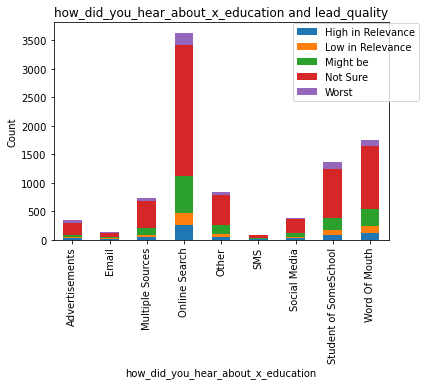

<Figure size 1800x1080 with 0 Axes>

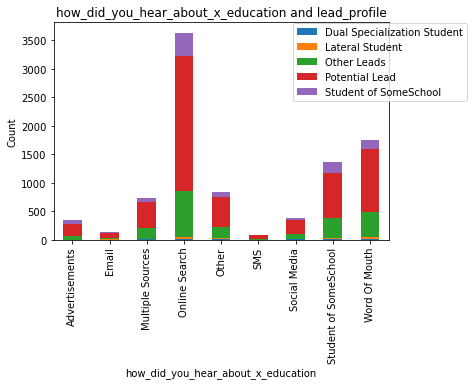

<Figure size 1800x1080 with 0 Axes>

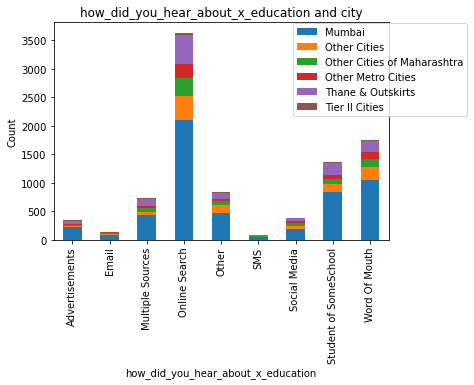

<Figure size 1800x1080 with 0 Axes>

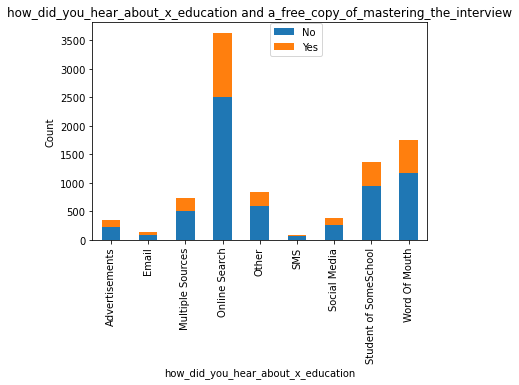

<Figure size 1800x1080 with 0 Axes>

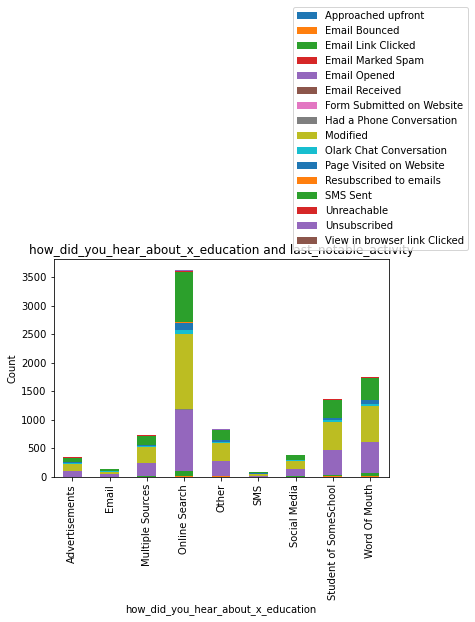

In [21]:
for i in Cat_updated[7:]:
    tab = pd.crosstab(index=LS['how_did_you_hear_about_x_education'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('how_did_you_hear_about_x_education')
    plt.ylabel('Count')
    plt.title('how_did_you_hear_about_x_education and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

#### Inferences on lead_origin Vs all other categorical attributes:

## For "what_is_your_current_occupation" 

<Figure size 1800x1080 with 0 Axes>

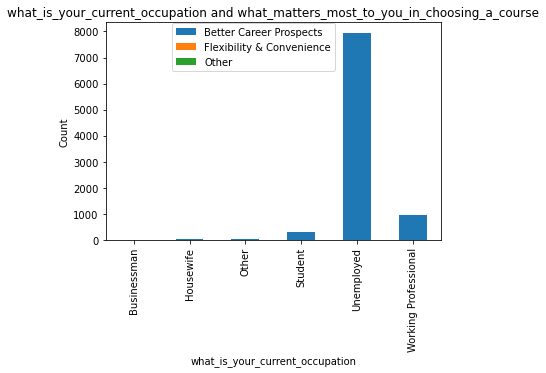

<Figure size 1800x1080 with 0 Axes>

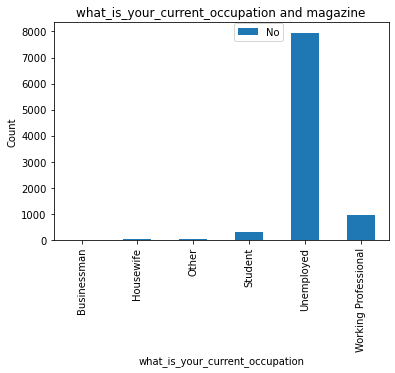

<Figure size 1800x1080 with 0 Axes>

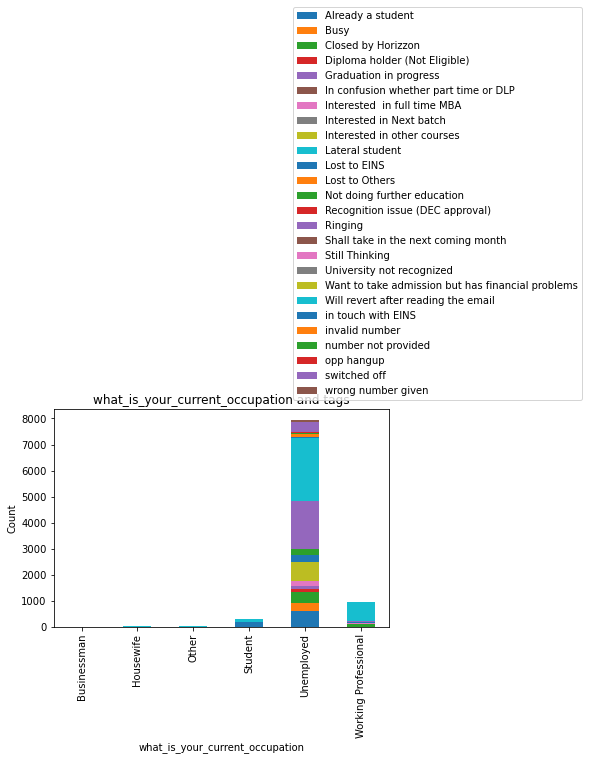

<Figure size 1800x1080 with 0 Axes>

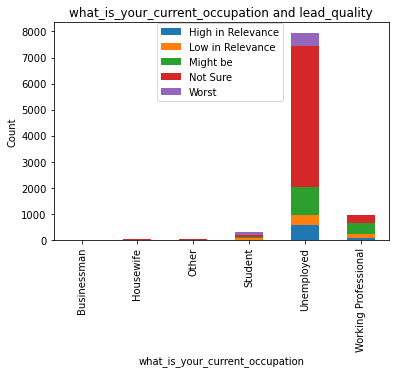

<Figure size 1800x1080 with 0 Axes>

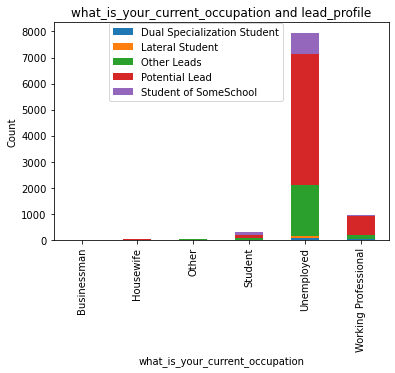

<Figure size 1800x1080 with 0 Axes>

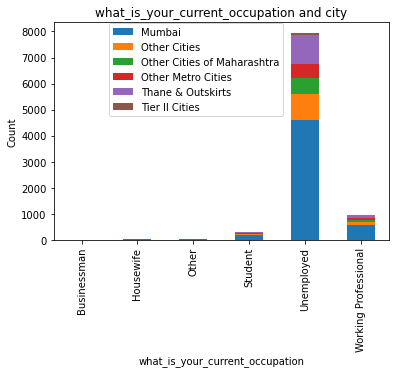

<Figure size 1800x1080 with 0 Axes>

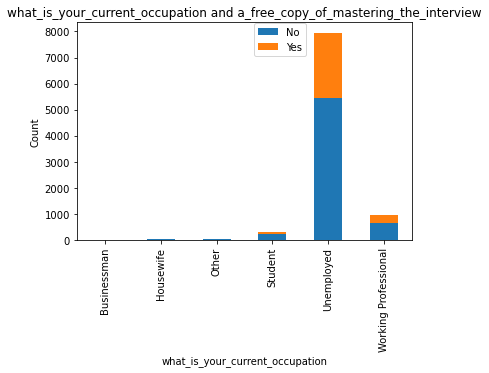

<Figure size 1800x1080 with 0 Axes>

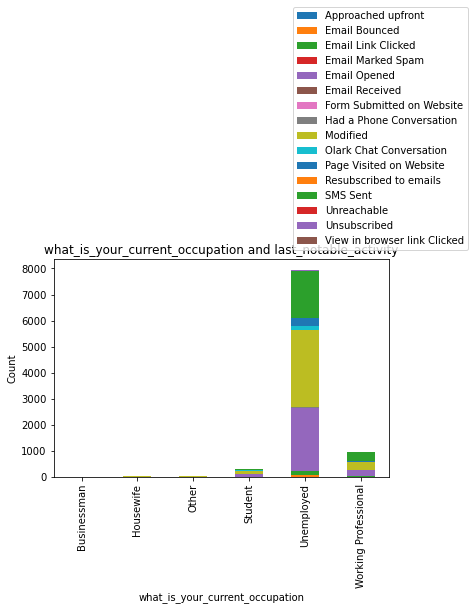

In [22]:
for i in Cat_updated[8:]:
    tab = pd.crosstab(index=LS['what_is_your_current_occupation'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('what_is_your_current_occupation')
    plt.ylabel('Count')
    plt.title('what_is_your_current_occupation and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

#### Inferences on what_is_your_current_occupation Vs all other categorical attributes:

## For "what_matters_most_to_you_in_choosing_a_course"

<Figure size 1800x1080 with 0 Axes>

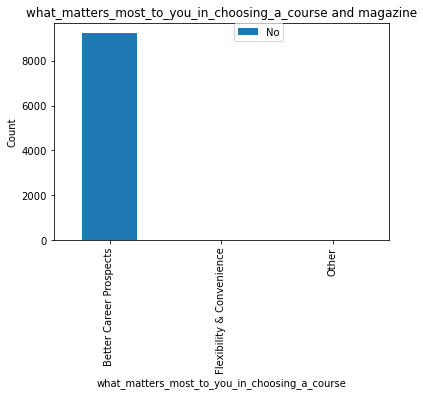

<Figure size 1800x1080 with 0 Axes>

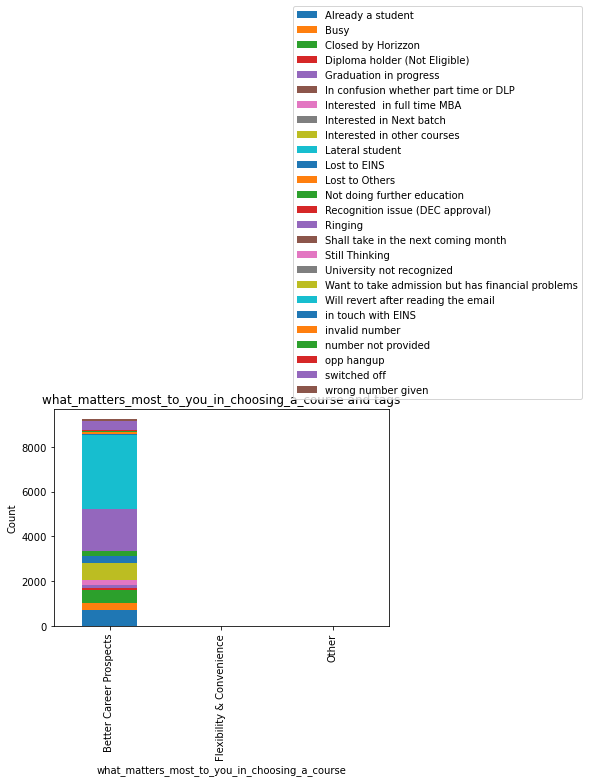

<Figure size 1800x1080 with 0 Axes>

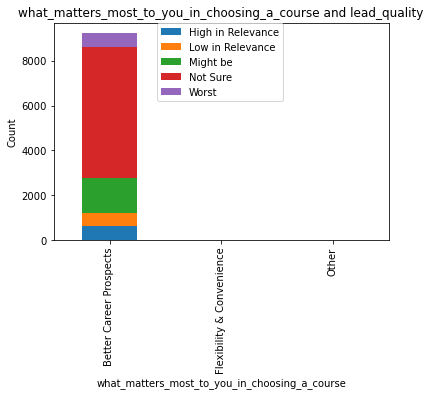

<Figure size 1800x1080 with 0 Axes>

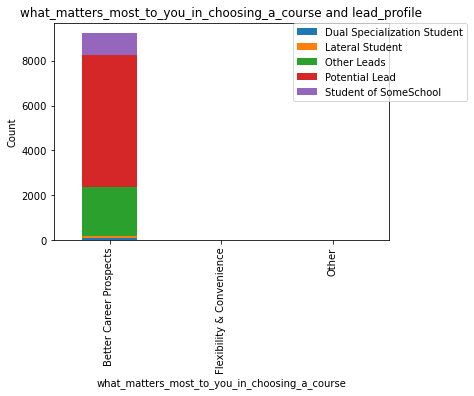

<Figure size 1800x1080 with 0 Axes>

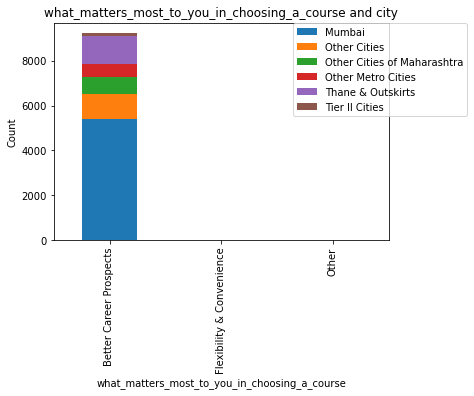

<Figure size 1800x1080 with 0 Axes>

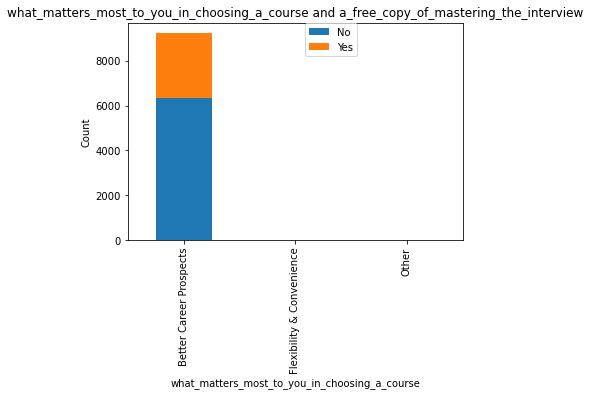

<Figure size 1800x1080 with 0 Axes>

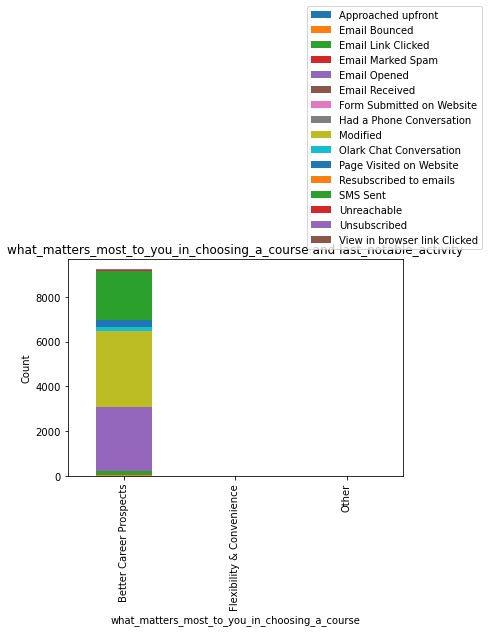

In [23]:
for i in Cat_updated[9:]:
    tab = pd.crosstab(index=LS['what_matters_most_to_you_in_choosing_a_course'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('what_matters_most_to_you_in_choosing_a_course')
    plt.ylabel('Count')
    plt.title('what_matters_most_to_you_in_choosing_a_course and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

#### Inferences on what_matters_most_to_you_in_choosing_a_course Vs all other categorical attributes:

## For "magazine"

<Figure size 1800x1080 with 0 Axes>

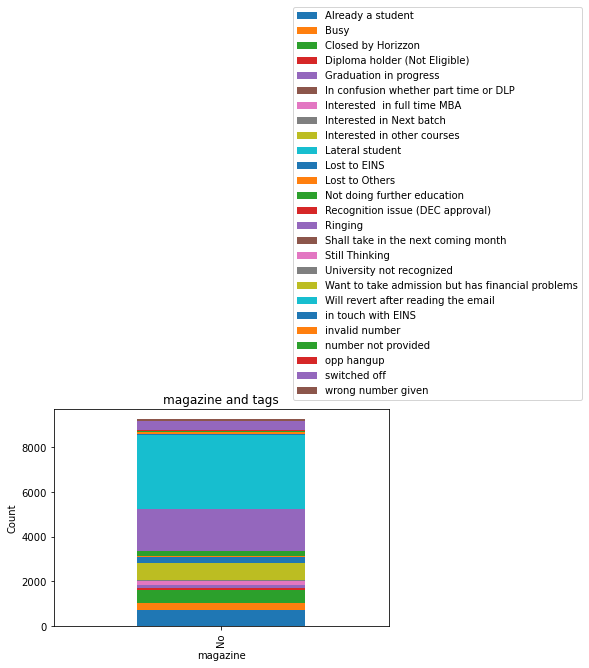

<Figure size 1800x1080 with 0 Axes>

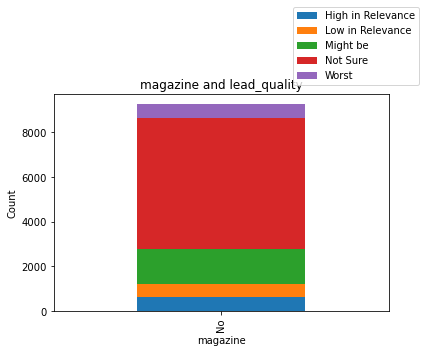

<Figure size 1800x1080 with 0 Axes>

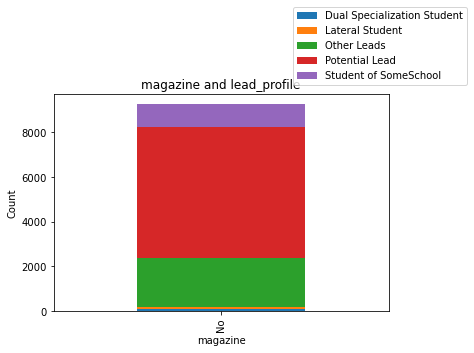

<Figure size 1800x1080 with 0 Axes>

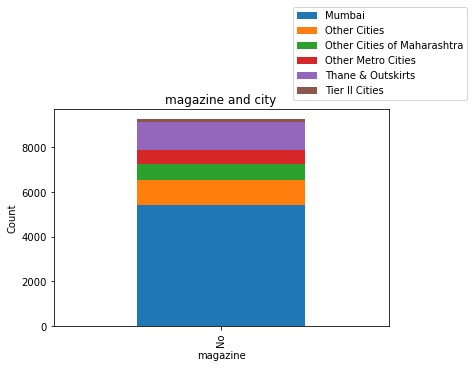

<Figure size 1800x1080 with 0 Axes>

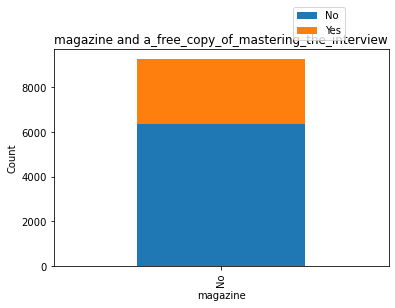

<Figure size 1800x1080 with 0 Axes>

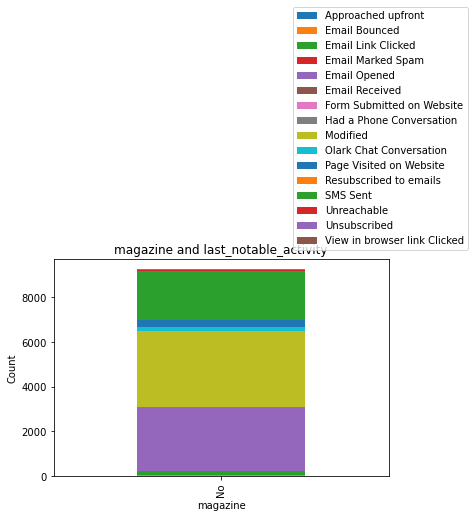

In [24]:
for i in Cat_updated[10:]:
    tab = pd.crosstab(index=LS['magazine'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('magazine')
    plt.ylabel('Count')
    plt.title('magazine and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

#### Inferences on magazine Vs all other categorical attributes:

## For tags

<Figure size 1800x1080 with 0 Axes>

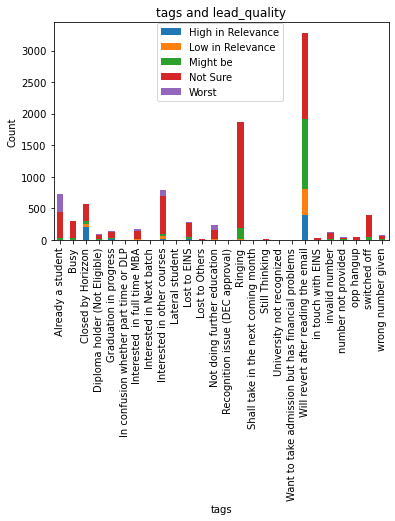

<Figure size 1800x1080 with 0 Axes>

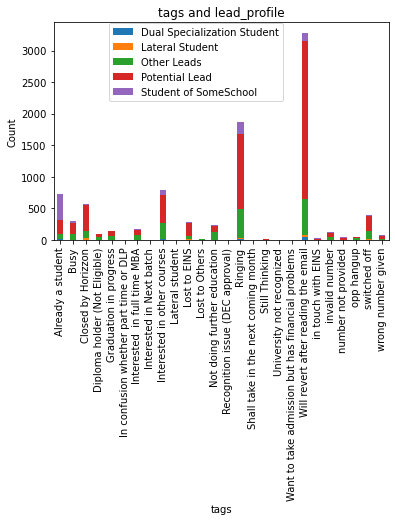

<Figure size 1800x1080 with 0 Axes>

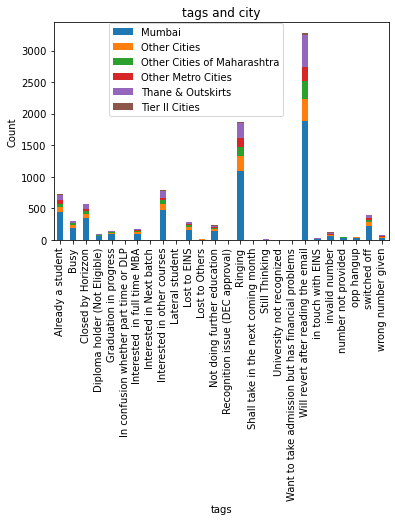

<Figure size 1800x1080 with 0 Axes>

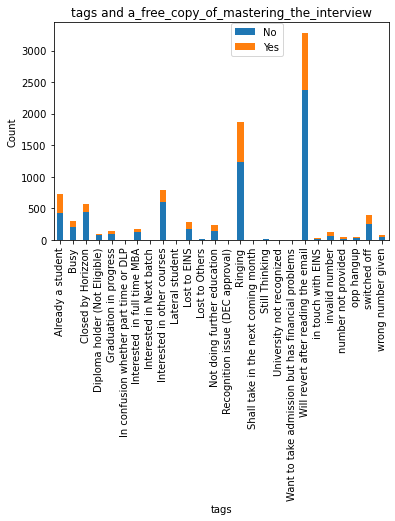

<Figure size 1800x1080 with 0 Axes>

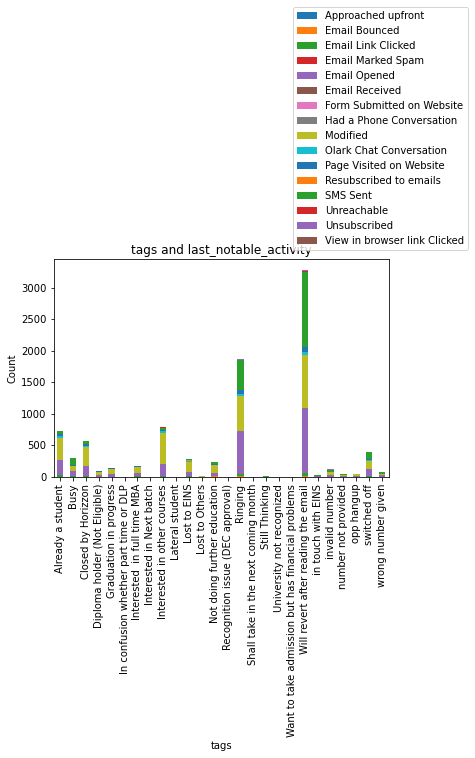

In [25]:
for i in Cat_updated[11:]:
    tab = pd.crosstab(index=LS['tags'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('tags')
    plt.ylabel('Count')
    plt.title('tags and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

#### Inferences on tags Vs all other categorical attributes:

## For lead_quality

<Figure size 1800x1080 with 0 Axes>

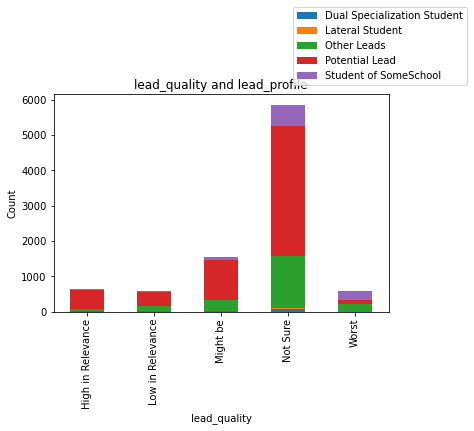

<Figure size 1800x1080 with 0 Axes>

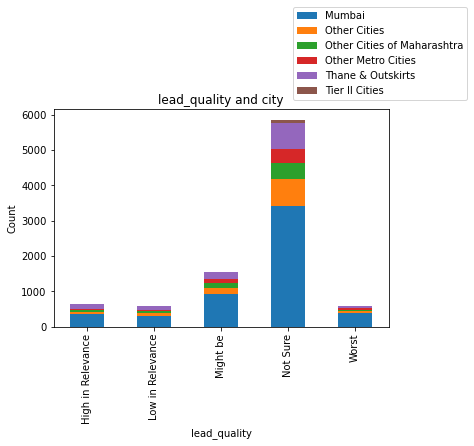

<Figure size 1800x1080 with 0 Axes>

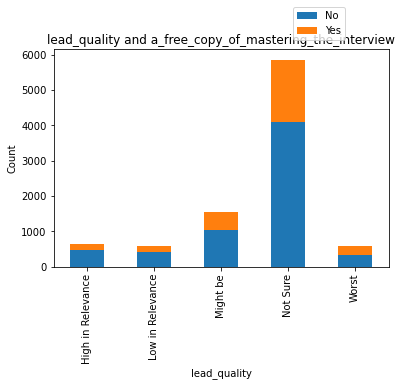

<Figure size 1800x1080 with 0 Axes>

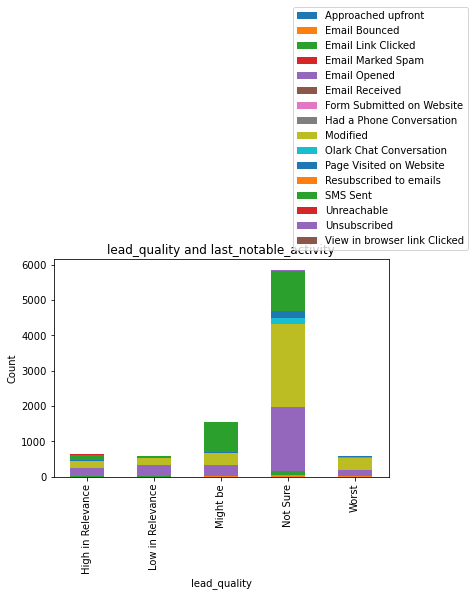

In [26]:
for i in Cat_updated[12:]:
    tab = pd.crosstab(index=LS['lead_quality'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('lead_quality')
    plt.ylabel('Count')
    plt.title('lead_quality and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

#### Inferences on lead_quality Vs all other categorical attributes:

## For lead_profile

<Figure size 1800x1080 with 0 Axes>

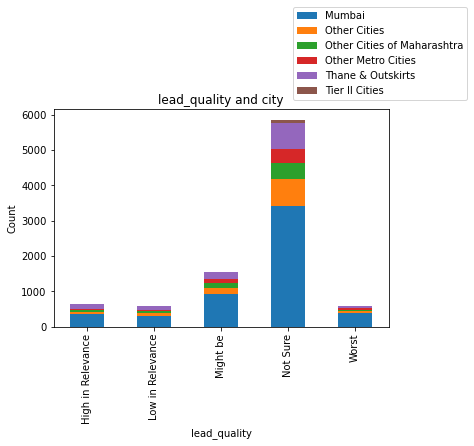

<Figure size 1800x1080 with 0 Axes>

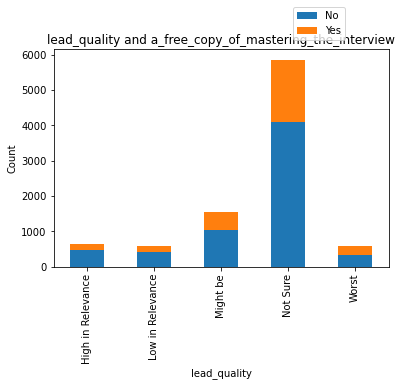

<Figure size 1800x1080 with 0 Axes>

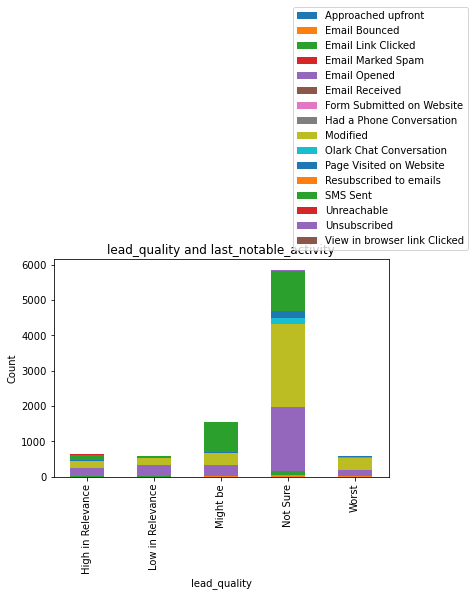

In [27]:
for i in Cat_updated[13:]:
    tab = pd.crosstab(index=LS['lead_quality'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('lead_quality')
    plt.ylabel('Count')
    plt.title('lead_quality and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

#### Inferences on lead_profile Vs all other categorical attributes:

## For lead_profile

<Figure size 1800x1080 with 0 Axes>

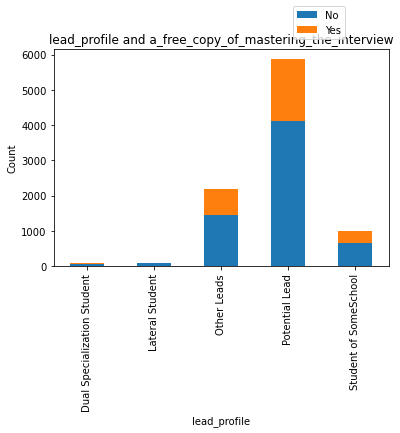

<Figure size 1800x1080 with 0 Axes>

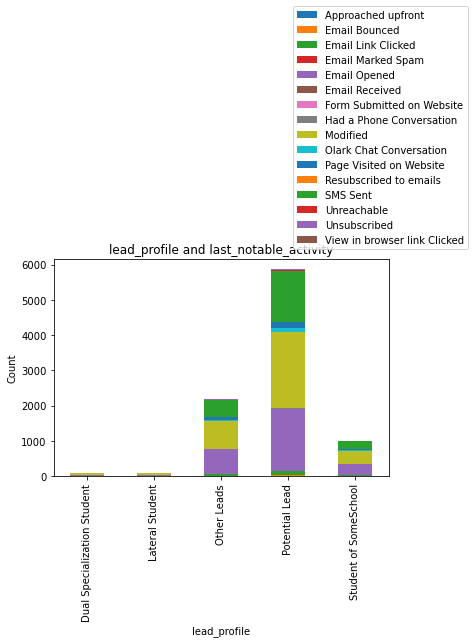

In [28]:
for i in Cat_updated[14:]:
    tab = pd.crosstab(index=LS['lead_profile'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('lead_profile')
    plt.ylabel('Count')
    plt.title('lead_profile and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

#### Inferences on lead_profile Vs all other categorical attributes:

## For city

<Figure size 1800x1080 with 0 Axes>

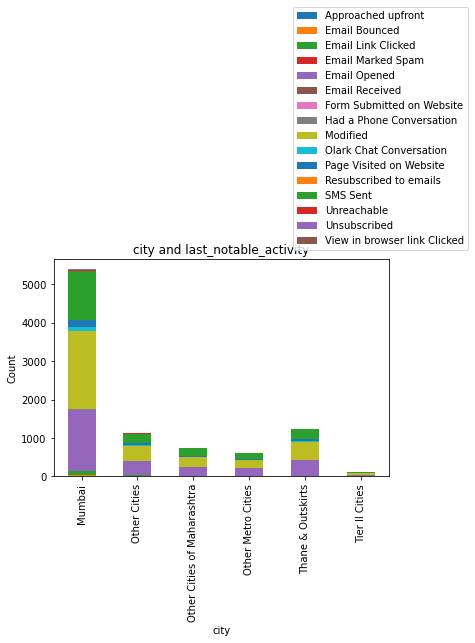

In [29]:
for i in Cat_updated[15:]:
    tab = pd.crosstab(index=LS['city'], columns=LS[i])
    plt.figure(figsize=(25,15))
    tab.plot(kind="bar", stacked=True)
    plt.xlabel('city')
    plt.ylabel('Count')
    plt.title('city and' + ' ' + str(i))
    plt.legend(loc='best', bbox_to_anchor=(0.7,1.02))
    plt.show()

#### Inferences on city Vs all other categorical attributes: